In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
%cd /content/drive/MyDrive/DL/KTS/KTS2

/content/drive/MyDrive/DL/KTS/KTS2


In [3]:
import numpy as np
# Thanks to https://github.com/TatsuyaShirakawa/KTS for the following packages
from cpd_nonlin import cpd_nonlin
from cpd_auto import cpd_auto

In [5]:
from matplotlib import pyplot as plt
plt.ioff()

def detect_boundaries(X, Epected_number_of_events, plat = False):
  n= X.shape[0]
  d = X.shape[0]
  K = np.dot(X, X.T)
  cps, scores = cpd_auto(K, 2*Epected_number_of_events, 1)

  if plat:
    plt.plot(X)
    mi = np.min(X)
    ma = np.max(X)
    for cp in cps:
      plt.plot([cp, cp], [mi, ma], 'r')
    plt.show()

  return cps, scores

In [10]:
def find_output(GT_start_hard,GT_end_hard,GT_start_soft, GT_end_soft, cps, FPS=2, Game_start=0):
  y = ((cps/FPS)+Game_start)/60 
  boundaries = y//1 + (y%1)*0.6
  
  Number_of_events = GT_start_hard.shape[0]
  mi = -1
  ma = 1
  for cp in boundaries:
    plt.plot([cp, cp], [mi, ma], 'r')
  for i in range(Number_of_events):
    plt.plot([GT_start_hard[i], GT_end_hard[i]], [mi, ma], 'b')
    plt.plot([GT_start_soft[i], GT_end_soft[i]], [0.5*(mi+ma), 0.5*(mi+ma)], 'g')
    plt.plot([GT_end_soft[i], GT_end_soft[i]], [0.1*(mi), 0.1*(ma)], 'y')
  plt.show()

  return boundaries

In [7]:
import numpy as np

GT_start_hard = np.array([11.06, 11.18,11.51,12.01,12.45])
GT_end_hard = np.array([11.06,11.2,11.53,12.03, 12.45])
GT_start_soft = np.array([10.51, 11.18,11.49,11.51,12.40])
GT_end_soft = np.array([11.08,11.2,11.56,12.05, 13.14])

C3D

Precomputing scatters...
Inferring best change points...
Precomputing scatters...
Inferring best change points...


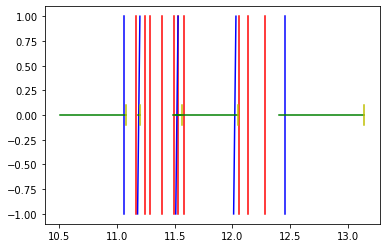

array([11.165, 11.24 , 11.285, 11.395, 11.495, 11.53 , 11.585, 12.055,
       12.13 , 12.285])

In [21]:
Vid = np.load('/content/drive/MyDrive/DL/features/1_C3D.npy')
Vid = Vid.reshape((5399,4096))

Game_start = 11*60 + 6
Time_First_frame = Game_start 
Epected_number_of_events = 5
FPS =2

Event_frame_start = (Time_First_frame - Game_start)*FPS #=0
Event_frame_end = (12*60 + 45  - Game_start)*FPS
X = Vid[Event_frame_start:Event_frame_end, :]

cps, scores = detect_boundaries(X, Epected_number_of_events)

find_output(GT_start_hard,GT_end_hard,GT_start_soft, GT_end_soft, cps, FPS, Game_start)

C3D_PCA512

Precomputing scatters...
Inferring best change points...
Precomputing scatters...
Inferring best change points...


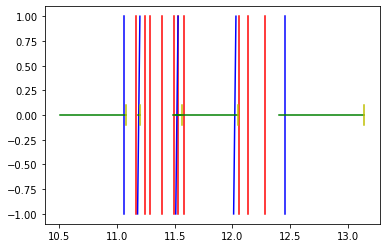

array([11.165, 11.24 , 11.285, 11.395, 11.495, 11.53 , 11.585, 12.055,
       12.13 , 12.285])

In [22]:
Vid = np.load('/content/drive/MyDrive/DL/features/1_C3D_PCA512.npy')

Game_start = 11*60 + 6
Time_First_frame = Game_start 
Epected_number_of_events = 5
FPS =2

Event_frame_start = (Time_First_frame - Game_start)*FPS #=0
Event_frame_end = (12*60 + 45  - Game_start)*FPS
X = Vid[Event_frame_start:Event_frame_end, :]

cps, scores = detect_boundaries(X, Epected_number_of_events)

find_output(GT_start_hard,GT_end_hard,GT_start_soft, GT_end_soft, cps, FPS, Game_start)

Conclusion :
* C3D and C3D_PCA yield almost identical results




Precomputing scatters...
Inferring best change points...
Precomputing scatters...
Inferring best change points...


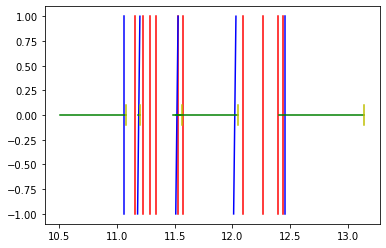

array([11.16 , 11.23 , 11.285, 11.34 , 11.525, 11.575, 12.095, 12.265,
       12.395, 12.435])

In [23]:
Vid = np.load('/content/drive/MyDrive/DL/features/1_I3D_PCA512.npy')

Game_start = 11*60 + 6
Time_First_frame = Game_start 
Epected_number_of_events = 5
FPS =2

Event_frame_start = (Time_First_frame - Game_start)*FPS #=0
Event_frame_end = (12*60 + 45  - Game_start)*FPS
X = Vid[Event_frame_start:Event_frame_end, :]

cps, scores = detect_boundaries(X, Epected_number_of_events)

find_output(GT_start_hard,GT_end_hard,GT_start_soft, GT_end_soft, cps, FPS, Game_start)

* I3D is worse than C3D_PCA512

Resnet_PCA512

Precomputing scatters...
Inferring best change points...
Precomputing scatters...
Inferring best change points...


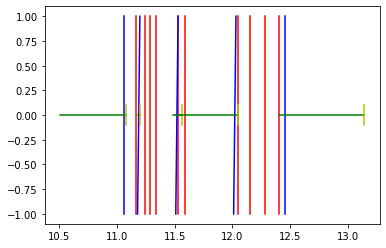

array([11.17 , 11.245, 11.29 , 11.34 , 11.53 , 11.59 , 12.05 , 12.15 ,
       12.285, 12.405])

In [24]:
Vid = np.load('/content/drive/MyDrive/DL/features/1_ResNET_PCA512.npy')

Game_start = 11*60 + 6
Time_First_frame = Game_start 
Epected_number_of_events = 5
FPS =2

Event_frame_start = (Time_First_frame - Game_start)*FPS #=0
Event_frame_end = (12*60 + 45  - Game_start)*FPS
X = Vid[Event_frame_start:Event_frame_end, :]

cps, scores = detect_boundaries(X, Epected_number_of_events)

find_output(GT_start_hard,GT_end_hard,GT_start_soft, GT_end_soft, cps, FPS, Game_start)

* Resnet is the best (last event was detected better than C3D)

Next step:

Use features extracted from an action spotting model